In [1]:
import jieba
import math
import pandas as pd
import numpy as np
#从Excle读取题目数据
df = pd.read_excel('data.xlsx',sheet_name='Sheet1') 
#读取停用词
stopword = pd.read_csv("stopword.txt",header=None,encoding="ISO-8859-1")
df



,序号,问题,答案,作答者回答,分数
0,1,物流系统的组成是？,物流系统由“物流作业系统”和支持物流信息流动的“物流信息系统”两大部分组成。,物流系统由“物流作业系统”和支持物流信息流动的“物流信息系统”两大部分组成。,NaN
1,2,物流系统的组成是？,物流系统由“物流作业系统”和支持物流信息流动的“物流信息系统”两大部分组成。,物流系统由“物流作业系统”和“物流信息系统”两大部分组成。,NaN
2,3,物流系统的组成是？,物流系统由“物流作业系统”和支持物流信息流动的“物流信息系统”两大部分组成。,由“物流作业系统”和支持物流信息流动的“物流信息系统”两大部分组成。,NaN
3,4,物流系统的组成是？,物流系统由“物流作业系统”和支持物流信息流动的“物流信息系统”两大部分组成。,由“物流作业系统”和“物流信息系统”两大部分组成。,NaN
4,5,物流系统的组成是？,物流系统由“物流作业系统”和支持物流信息流动的“物流信息系统”两大部分组成。,“物流作业系统”和“物流信息系统”,NaN
5,6,物流系统的组成是？,物流系统由“物流作业系统”和支持物流信息流动的“物流信息系统”两大部分组成。,“物流作业系统”和支持物流信息流动的“物流信息系统”,NaN
6,7,物流系统的组成是？,物流系统由“物流作业系统”和支持物流信息流动的“物流信息系统”两大部分组成。,“物流作业系统”,NaN
7,8,物流系统的组成是？,物流系统由“物流作业系统”和支持物流信息流动的“物流信息系统”两大部分组成。,“物流信息系统”,NaN
8,9,物流系统的组成是？,物流系统由“物流作业系统”和支持物流信息流动的“物流信息系统”两大部分组成。,两大部分组成,NaN
9,10,物流系统的组成是？,物流系统由“物流作业系统”和支持物流信息流动的“物流信息系统”两大部分组成。,物流系统,NaN


In [2]:
#计算余弦相似度
def cal(s1,s2):
    print(s1,s2)
    sum = 0
    sq1 = 0
    sq2 = 0
    for i in range(len(s1)):
        sum += s1[i] * s2[i]
        sq1 += s1[i] * s1[i]
        sq2 += s2[i] * s2[i]
    if(sq1 == 0 or sq2 == 0):
        return 0
    else :
        return sum / (math.sqrt(sq1) * math.sqrt(sq2))


In [3]:
for index in df.index:
    #去除空字符串
    s1 = [j for j in jieba.cut(df["答案"][index], cut_all=True) if j != '']
    s2 = [j for j in jieba.cut(df["作答者回答"][index], cut_all=True) if j != '']
    print(s1,s2)
    dic = {}
    count = 0
    
    #获取字符串集合
    word_set = set(s1).union(set(s2))
    for word in word_set:
        dic[word] = count
        count += 1
    
    #获取独热编码
    list1 = []
    list2 = []
    for word in range(len(word_set)):
        list1.append(0)
        list2.append(0)
    for word in s1:
        list1[dic[word]] += 1
    for word in s2:
        list2[dic[word]] += 1
    
    #计算总分
    score = cal(list1, list2)
    
    #写入excle
    df["分数"][index] = max(int(10 - (10 - int((score + 0.1) * 10)) * 2), 0)
    df.to_excel('data.xlsx', sheet_name = 'Sheet1', index = False, header = True)
df

Building prefix dict from the default dictionary ...
Loading model from cache C:\tmp\jieba.cache
Loading model cost 1.278 seconds.
Prefix dict has been built succesfully.
D:\anaconda\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


['物流', '系统', '统由', '物流', '作业', '作业系统', '系统', '和', '支持', '支持物', '物流', '信息', '信息流', '流动', '的', '物流', '信息', '信息系统', '系统', '两大部', '大部', '大部分', '部分', '分组', '组成'] ['物流', '系统', '统由', '物流', '作业', '作业系统', '系统', '和', '支持', '支持物', '物流', '信息', '信息流', '流动', '的', '物流', '信息', '信息系统', '系统', '两大部', '大部', '大部分', '部分', '分组', '组成']
[2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1] [2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1]
['物流', '系统', '统由', '物流', '作业', '作业系统', '系统', '和', '支持', '支持物', '物流', '信息', '信息流', '流动', '的', '物流', '信息', '信息系统', '系统', '两大部', '大部', '大部分', '部分', '分组', '组成'] ['物流', '系统', '统由', '物流', '作业', '作业系统', '系统', '和', '物流', '信息', '信息系统', '系统', '两大部', '大部', '大部分', '部分', '分组', '组成']
[2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 3] [1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 3, 1, 1, 0, 1, 1, 1, 3]
['物流', '系统', '统由', '物流', '作业', '作业系统', '系统', '和', '支持', '支持物', '物流', '信息', '信息流', '流动', '的', '物流', '信息', '信息系统', '系统', '两大部', '大部', '大部分', '部分', '分组', '组成'] ['由', '物流', '作业', '作业系统', 

,序号,问题,答案,作答者回答,分数
0,1,物流系统的组成是？,物流系统由“物流作业系统”和支持物流信息流动的“物流信息系统”两大部分组成。,物流系统由“物流作业系统”和支持物流信息流动的“物流信息系统”两大部分组成。,10.0
1,2,物流系统的组成是？,物流系统由“物流作业系统”和支持物流信息流动的“物流信息系统”两大部分组成。,物流系统由“物流作业系统”和“物流信息系统”两大部分组成。,10.0
2,3,物流系统的组成是？,物流系统由“物流作业系统”和支持物流信息流动的“物流信息系统”两大部分组成。,由“物流作业系统”和支持物流信息流动的“物流信息系统”两大部分组成。,10.0
3,4,物流系统的组成是？,物流系统由“物流作业系统”和支持物流信息流动的“物流信息系统”两大部分组成。,由“物流作业系统”和“物流信息系统”两大部分组成。,8.0
4,5,物流系统的组成是？,物流系统由“物流作业系统”和支持物流信息流动的“物流信息系统”两大部分组成。,“物流作业系统”和“物流信息系统”,8.0
5,6,物流系统的组成是？,物流系统由“物流作业系统”和支持物流信息流动的“物流信息系统”两大部分组成。,“物流作业系统”和支持物流信息流动的“物流信息系统”,10.0
6,7,物流系统的组成是？,物流系统由“物流作业系统”和支持物流信息流动的“物流信息系统”两大部分组成。,“物流作业系统”,4.0
7,8,物流系统的组成是？,物流系统由“物流作业系统”和支持物流信息流动的“物流信息系统”两大部分组成。,“物流信息系统”,6.0
8,9,物流系统的组成是？,物流系统由“物流作业系统”和支持物流信息流动的“物流信息系统”两大部分组成。,两大部分组成,0.0
9,10,物流系统的组成是？,物流系统由“物流作业系统”和支持物流信息流动的“物流信息系统”两大部分组成。,物流系统,6.0


平均分为5.600,中位数为6.000,标准差为3.441,方差为11.840,最大分差为10.000


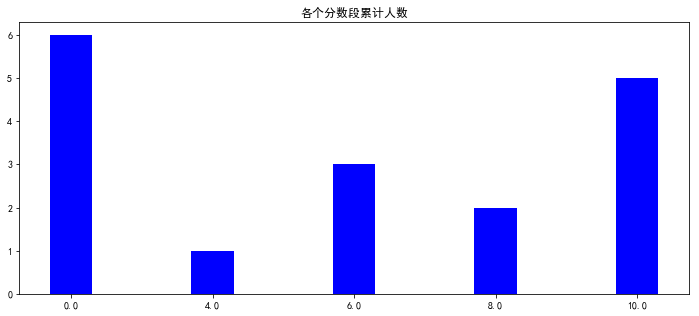

In [12]:
import  pandas  as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))#定义一个图像窗口
font = {'family':'SimHei'}
plt.rc('font',**font)
plt.title('各个分数段累计人数')
mp={}
for i in df.index:
    mp[df["分数"][i]]=mp.get(df["分数"][i],0)+1
#mp=sorted(mp.items(),key = lambda x:x[1],reverse=True)

cnt={}
cnt["分数"]=cnt.get("分数",list(mp.keys()))
cnt["人数"]=cnt.get("人数",list(mp.values()))
cnt=pd.DataFrame(cnt,columns=['分数','人数']) 
cnt=cnt.sort_values(by="分数",ascending= True)
cnt.reset_index(drop=True, inplace=True)
plt.bar(cnt.index,cnt["人数"],0.3,color='B')
plt.xticks(cnt.index ,cnt["分数"],rotation=0)
c=np.mean(cnt["分数"])
print("平均分为%.3f,中位数为%.3f,标准差为%.3f,方差为%.3f,最大分差为%.3f"%(c,np.median(cnt["分数"]),
                                                       np.std(cnt["分数"]),np.var(cnt["分数"]),np.ptp(cnt["分数"])))
plt.show()